<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-retail-sales-prediction-/blob/main/CAPSTONE_PROJECT_REGRESSION(retail_sales_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Retail Sales Prediction**

### Project Type - Regression
### Contribution - Individual

# **Project Summary -**





## I decide to do retail sales prediction project .when i download the project i ralize two dataset present in this project but in both dataset have comman colums name store and both column have same unique values.So i realized in secod dataset have some null values so i decide to replace null values. first data contain more columns compare to second dataset i decide to merge the dataset with left joind on first dataset . Then i check the correlation of all the numerical features with each other . Then remove the columns having higher vif and lower vorrelation with the target column name sales. then i check distribution of categorical features . then i am convertion categorical columns into numerical using label encoding . 

## **GitHub Link:** 
### https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-retail-sales-prediction-


# **Problem Statement**



## Retail Sales Prediction is a regression machine learning project. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.



# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path1='/content/drive/MyDrive/Almabetter/Machine Learning /Rossmann Stores Data.csv'
path2='/content/drive/MyDrive/Almabetter/Machine Learning /store (1).csv'
df=pd.read_csv(path1)
store=pd.read_csv(path2)

<ipython-input-4-590b69591c6d>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path1)


### Dataset First View

In [5]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(1017209, 9)

In [10]:
# Dataset Rows & Columns count
store.shape

(1115, 10)

### Dataset Information

In [11]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## **About dataset:**
This dataset contain information about over 3,000 drug stores in 7 European countries. the above Rossmann Stores dataset has 1017209 rows and 9 columns and store dataset has 1115 rows and 10 columns. 




## Duplicate Values

In [13]:
duplicate1 = df[df.duplicated()]
duplicate1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [14]:
duplicate2 =store[store.duplicated()] 
duplicate2

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


## No duplicate values ​​are present in this dataset

## Missing Values/Null Values

In [15]:
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
store.isnull().sum().sort_values(ascending=False)

Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
CompetitionDistance            3
Store                          0
StoreType                      0
Assortment                     0
Promo2                         0
dtype: int64

<Axes: >

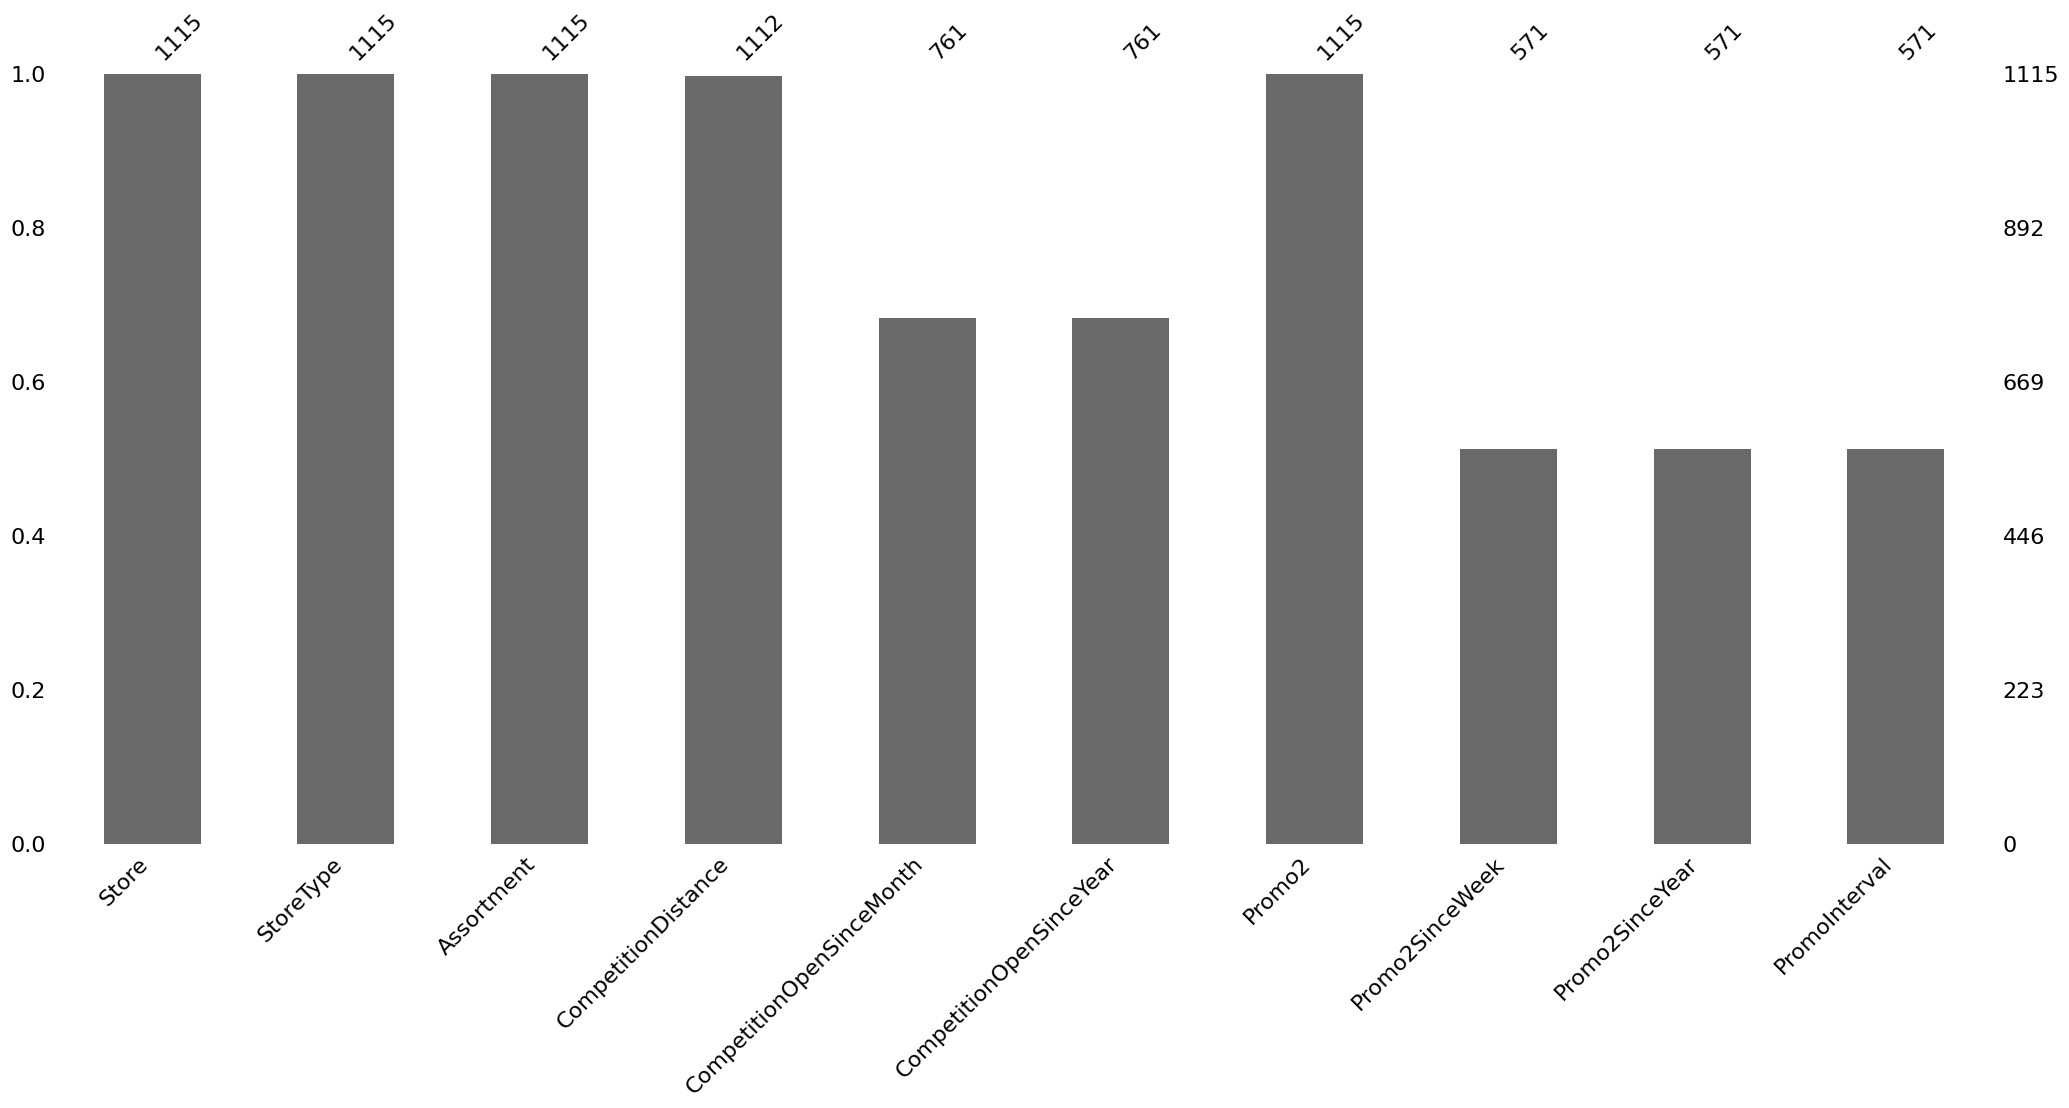

In [17]:
# Visualizing the missing values
msno.bar(store)

## **As we saw there are null values in columns. we are replacing missing values.**

In [18]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].mode()[0], inplace = True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode()[0], inplace = True)
store['Promo2SinceWeek'].fillna(store['Promo2SinceWeek'].mode()[0], inplace = True)
store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode()[0], inplace = True)
store['PromoInterval'].fillna(store['PromoInterval'].mode()[0], inplace = True)


<Axes: >

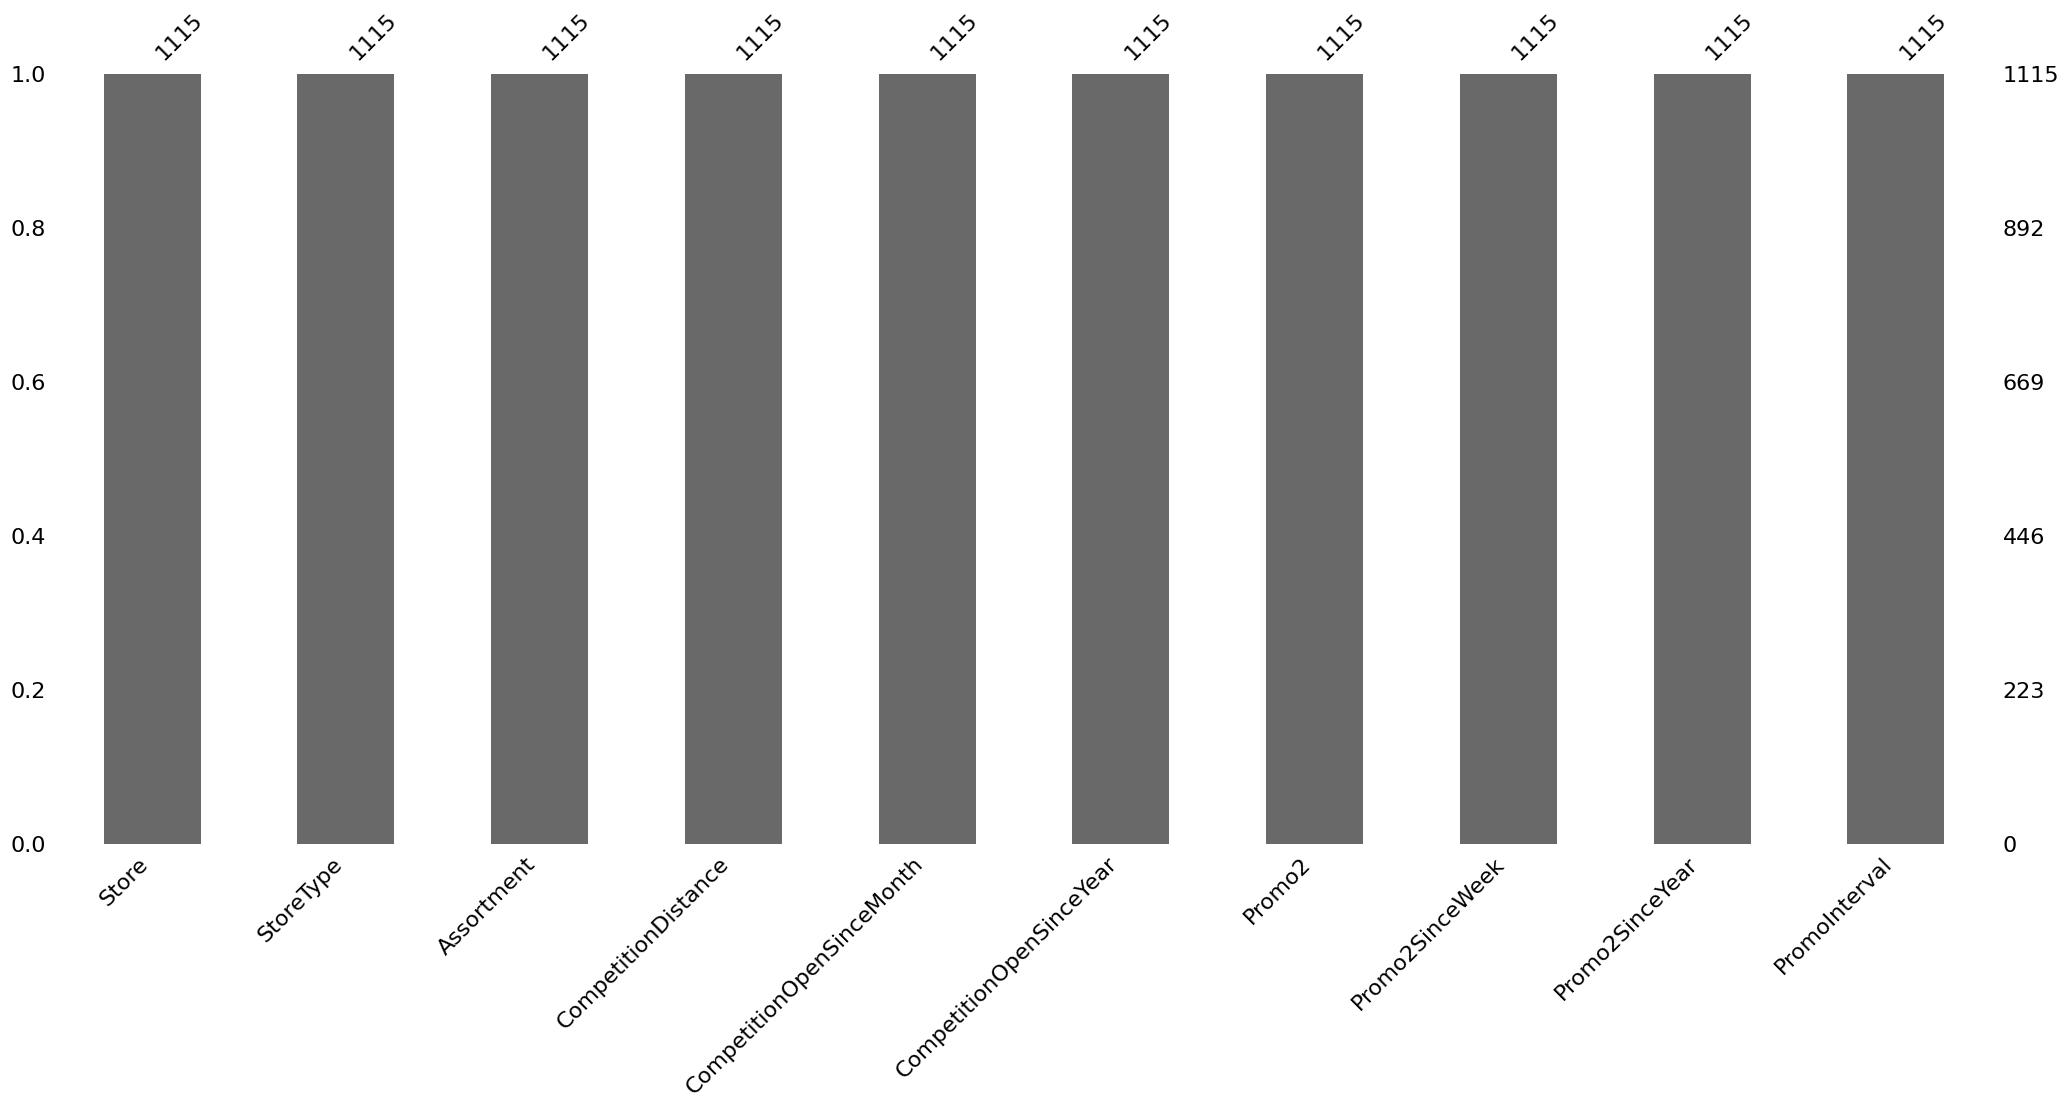

In [19]:
msno.bar(store)

In [20]:
project=pd.merge(left=df,right=store,how='left',on=['Store'])

In [21]:
project.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


## **Understanding Your Variables**

# Dataset Columns
###Id - an Id that represents a (Store, Date) duple within the test set
  
###Store - a unique Id for each store

###Sales - the turnover for any given day (this is what you are predicting)

###Customers - the number of customers on a given day

###Open - an indicator for whether the store was open: 0 = closed, 1 = open

###StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on 

###public holidays and weekends. a = public holiday, b = Easter holiday, c = 

###Christmas, 0 = None

###SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

###StoreType - differentiates between 4 different store models: a, b, c, d

###Assortment - describes an assortment level: a = basic, b = extra, c = extended

###CompetitionDistance - distance in meters to the nearest competitor store

###CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

###Promo - indicates whether a store is running a promo on that day

###Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 =store is not participating, 1 = store is participating

###Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

###PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [22]:
# Dataset Describe
project.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,801153
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.416631e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.863977e+01,2.011377e+03,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.709807e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.099723e+01,1.235230e+00,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,1.000000e+00,2.009000e+03,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.000000e+02,6.000000e+00,2.008000e+03,0.000000e+00,1.400000e+01,2.011000e+03,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.320000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.400000e+01,2.011000e+03,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03,NaN


## **Check Unique Values for each variable.**

In [23]:
# Check Unique Values for each variable.
project.nunique(dropna = True).sort_values(ascending=False)

Sales                        21734
Customers                     4086
Store                         1115
Date                           942
CompetitionDistance            654
Promo2SinceWeek                 24
CompetitionOpenSinceYear        23
CompetitionOpenSinceMonth       12
Promo2SinceYear                  7
DayOfWeek                        7
StateHoliday                     5
StoreType                        4
Assortment                       3
PromoInterval                    3
SchoolHoliday                    2
Promo2                           2
Promo                            2
Open                             2
dtype: int64

### **Exploratory Data Analysis**


## Which type of store has high sales and most customers

In [24]:
highcs=project.groupby('StoreType').agg({'Sales':'sum','Customers':'sum'})
highcs

,Sales,Customers
StoreType,,
a,3165334859,363541434
b,159231395,31465621
c,783221426,92129705
d,1765392943,156904995


<Figure size 1000x500 with 0 Axes>

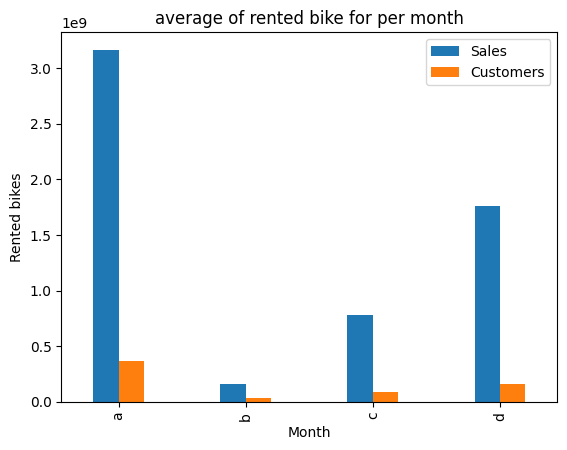

In [25]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
highcs.plot.bar(
        width = 0.4)
plt.xlabel("Month")
plt.ylabel("Rented bikes")
plt.title("average of rented bike for per month")
plt.show()

## **insights:**
##* Most of our revenue comes from a and d type stores
##* b type stores do not perform as well as compared to our other stores


In [26]:
numeric_features = project.describe().columns

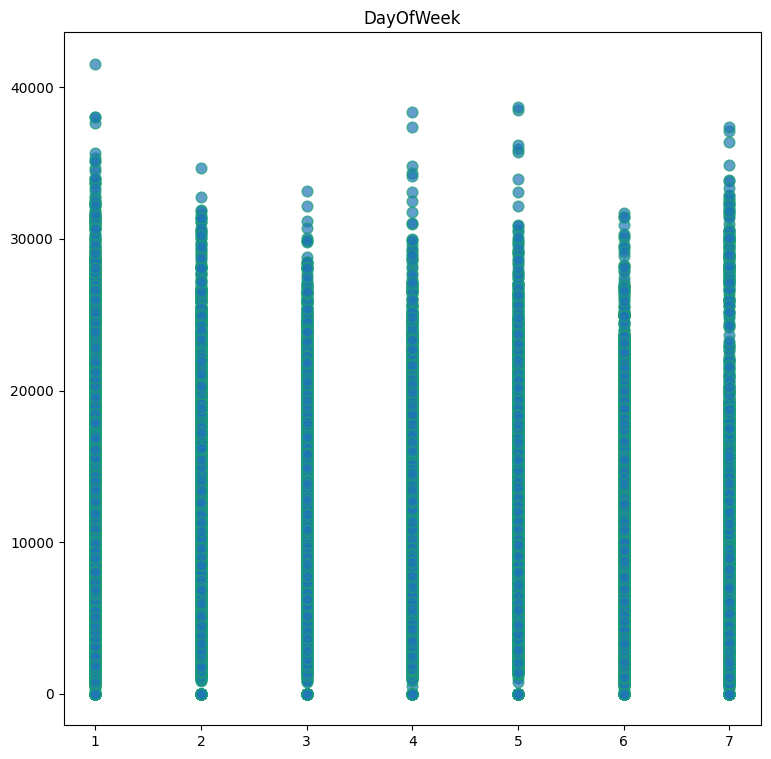

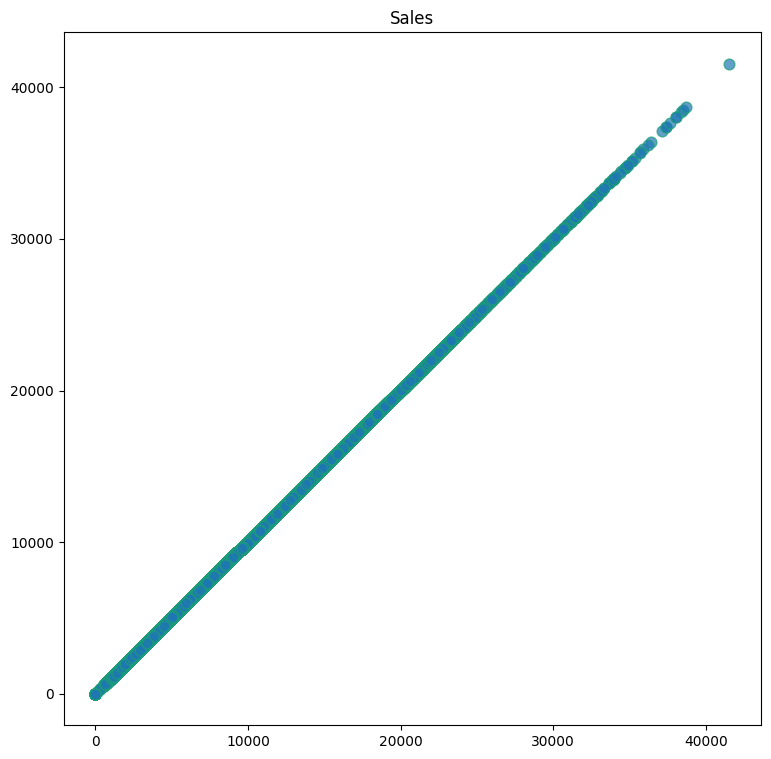

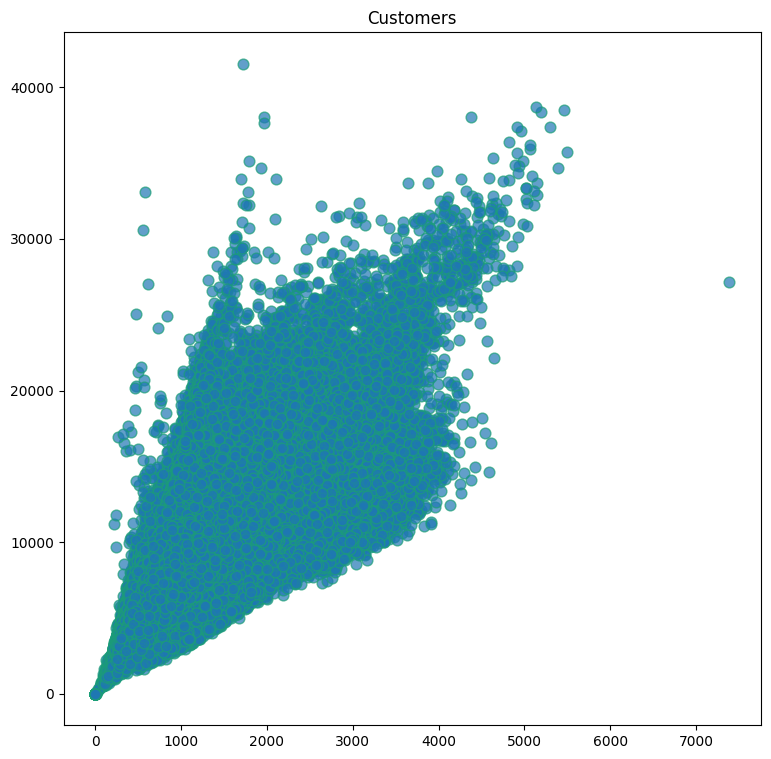

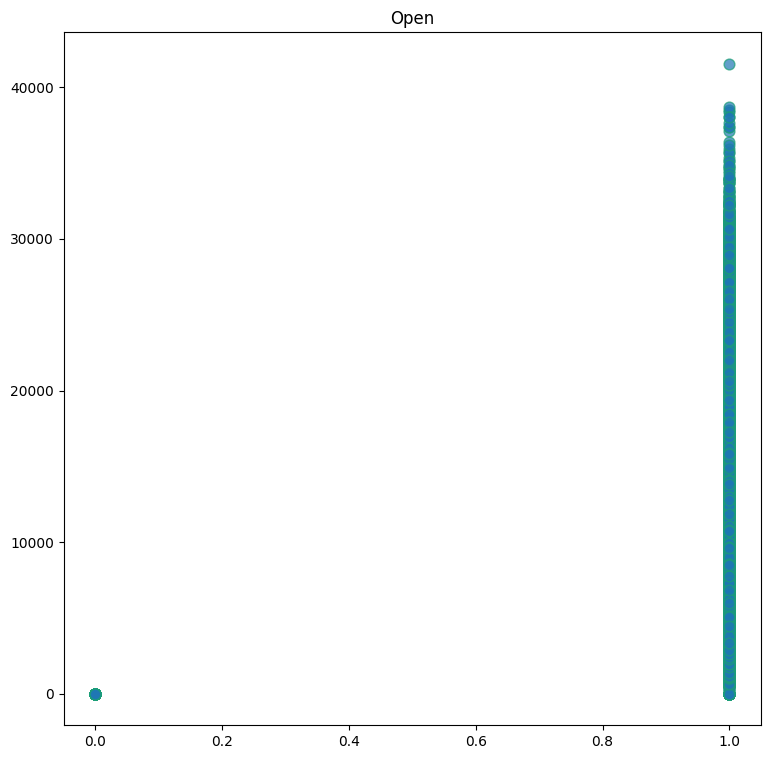

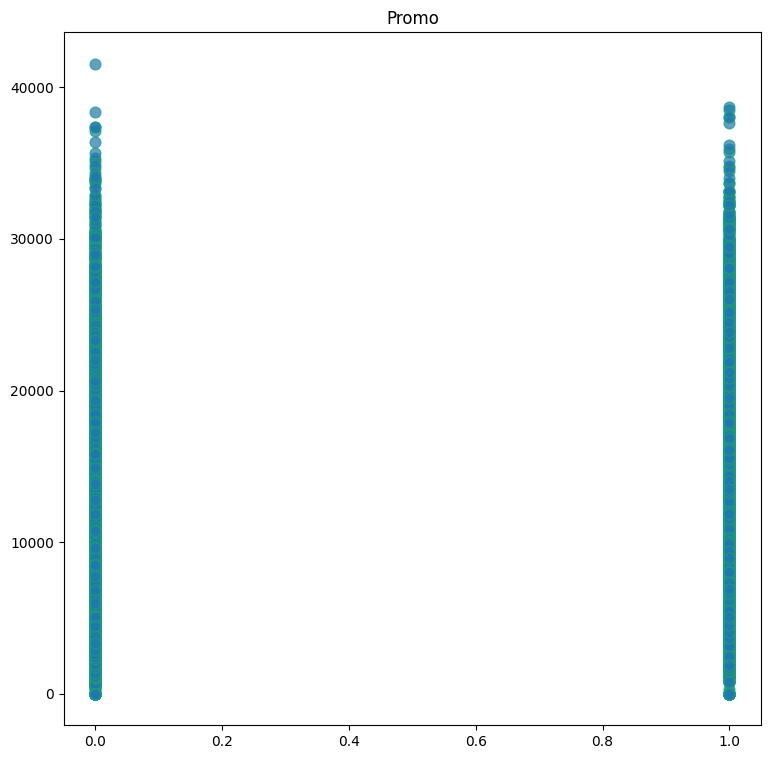

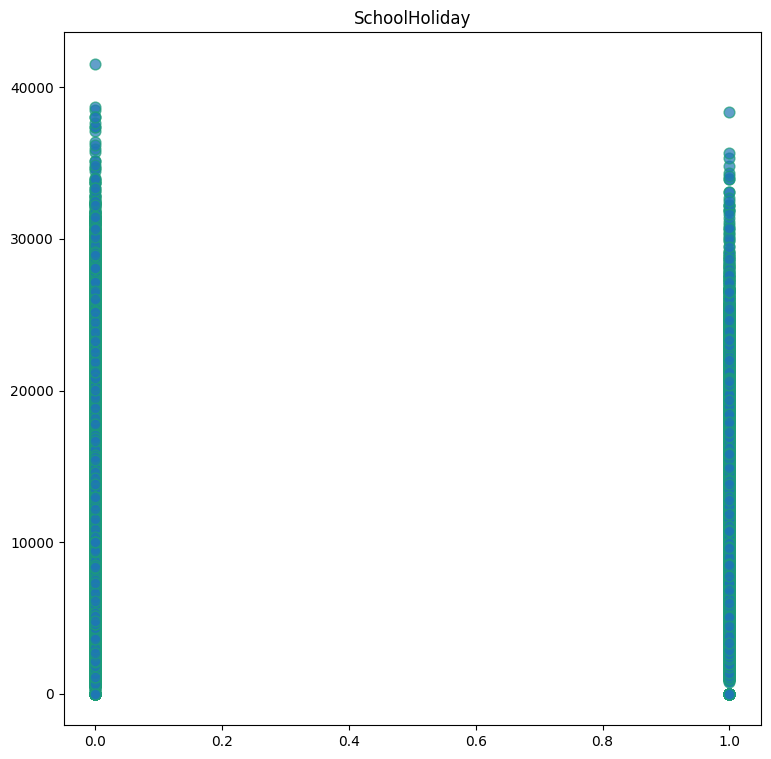

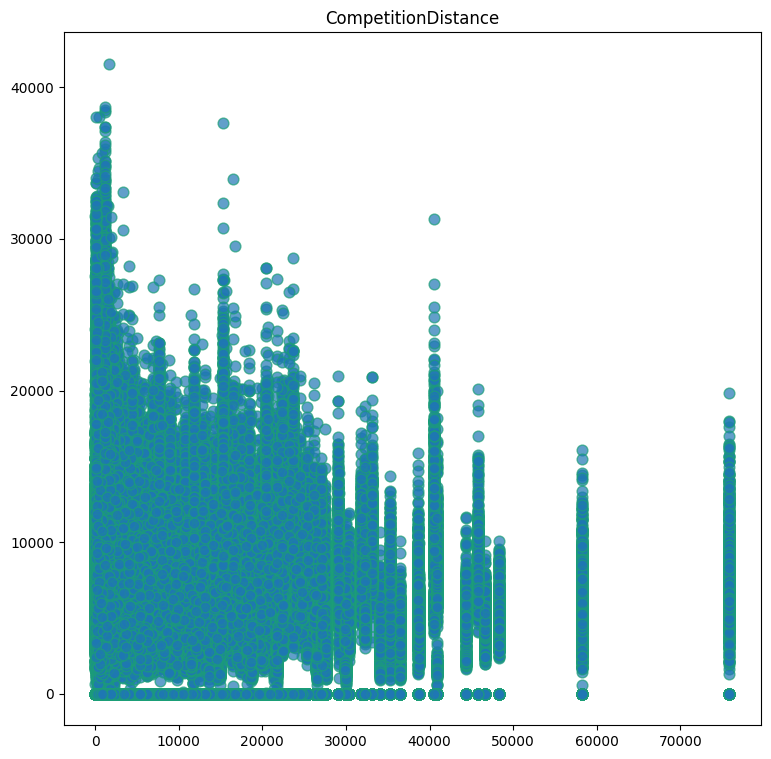

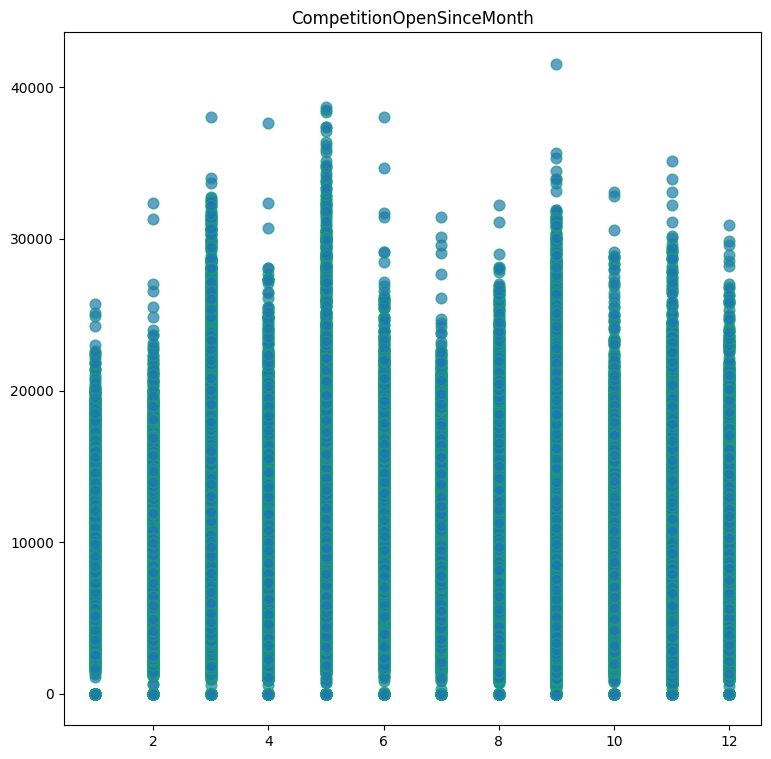

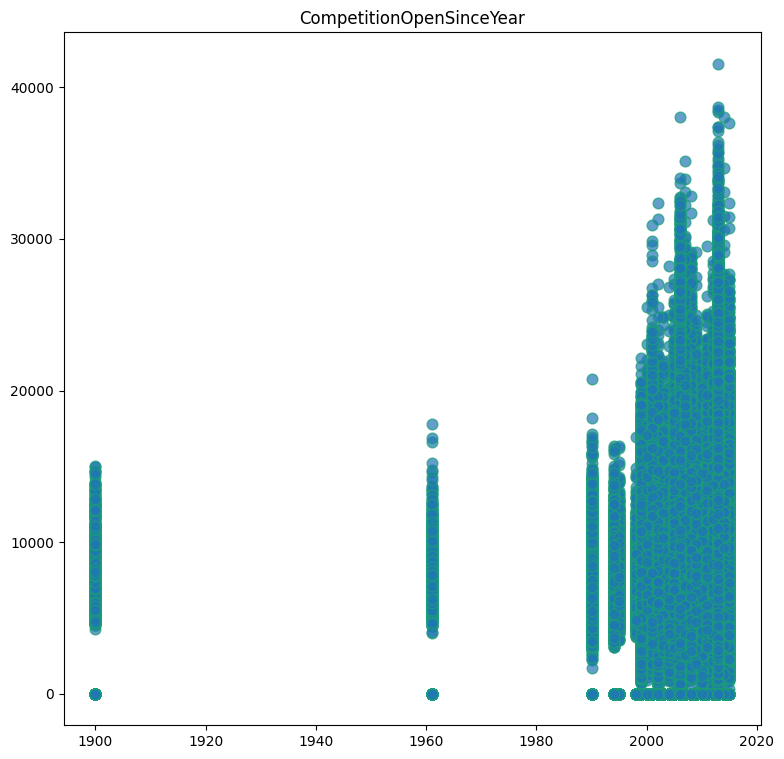

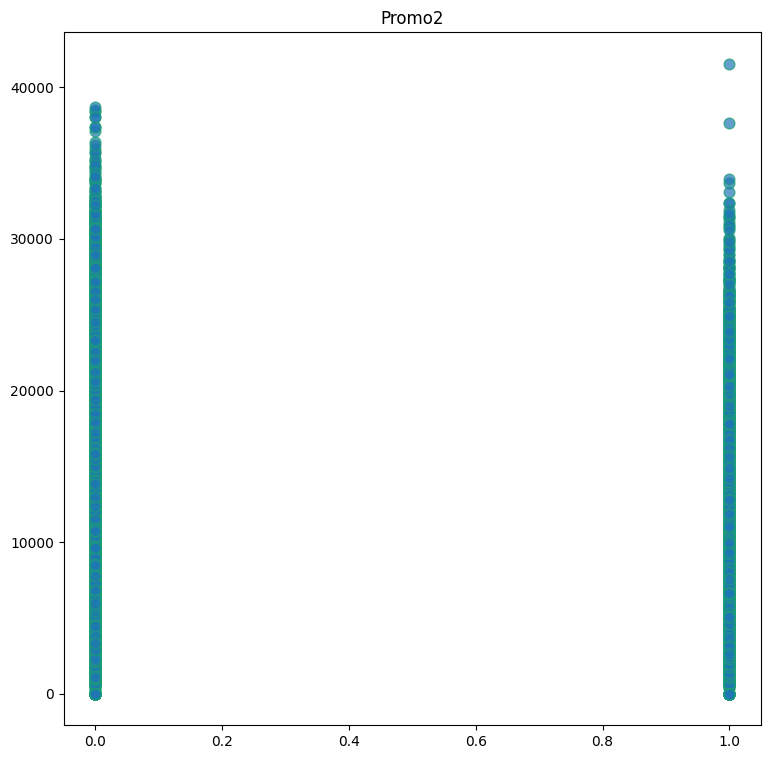

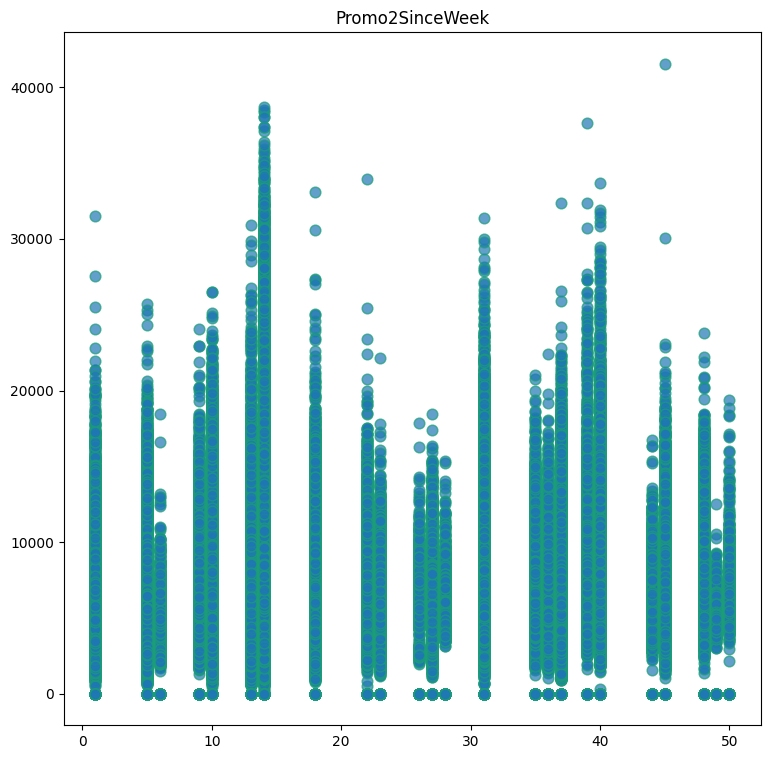

In [27]:
for i in numeric_features[1:-1]:
  x = project[i]
  y = project['Sales']
  fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
  ax.scatter(x, y, s=60, alpha=0.7, edgecolors="#1B9E77")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)

# Create sequence of 100 numbers from 0 to 100 
  xseq = np.linspace(0, 10, num=100)

# Plot regression line
  ax.plot( color="r", lw=2.5)
  ax.set_title(i)
plt.show()

In [28]:
numeric_features

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

<ipython-input-29-d71f47b76a4c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = project.corr()


<Axes: >

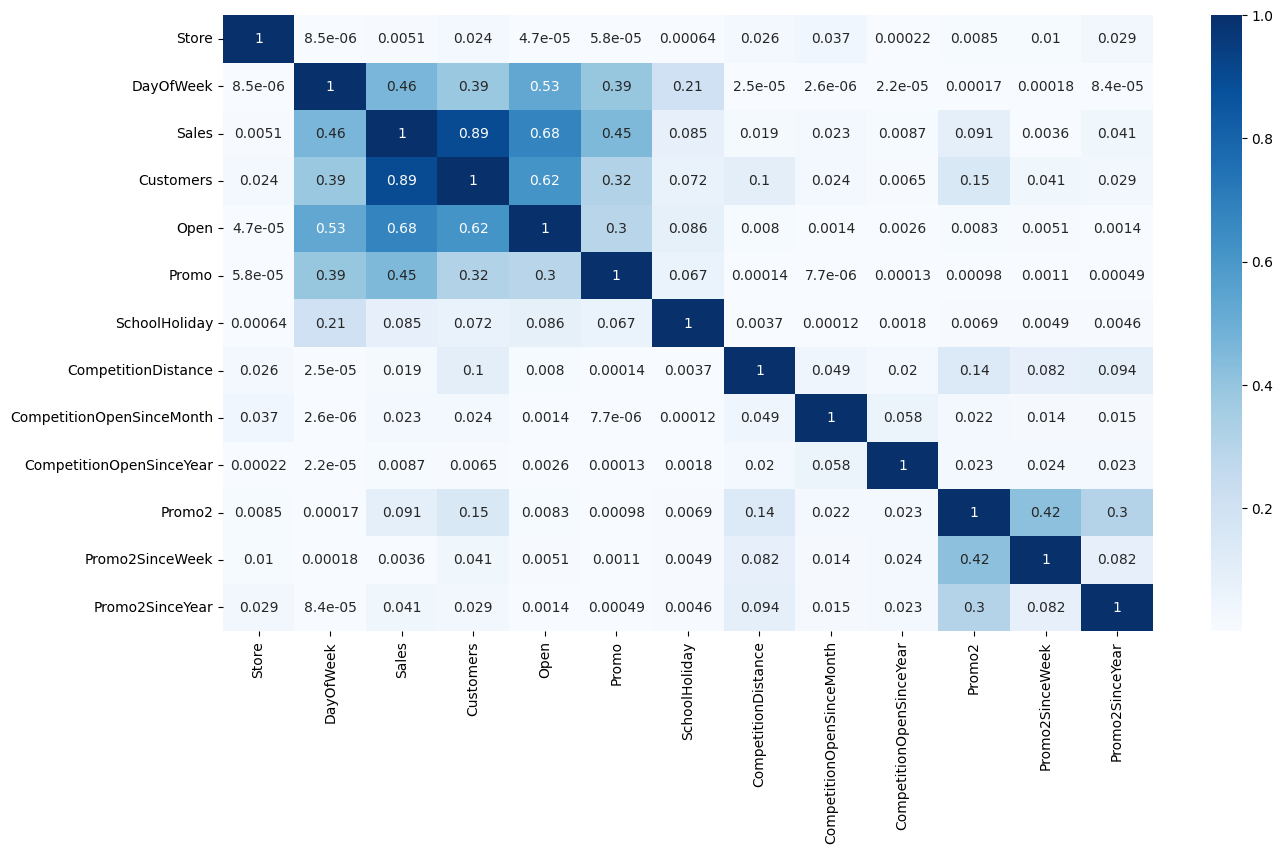

In [29]:
plt.figure(figsize=(15,8))
correlation = project.corr()
sns.heatmap(abs(correlation), annot=True, cmap="Blues")

# **Handling Multicollinearity**

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
#'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo','SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear'
calc_vif(project[[i for i in project.describe().columns if i not in ['Sales','CompetitionOpenSinceYear','Promo2SinceYear', 'Promo2SinceWeek','CompetitionOpenSinceMonth']]])

,variables,VIF
0,Store,3.577511
1,DayOfWeek,3.102990
2,Customers,5.064091
3,Open,7.946862
4,Promo,1.884325
5,SchoolHoliday,1.223948
6,CompetitionDistance,1.519211
7,Promo2,2.024688


In [32]:
numerical_features = ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo','SchoolHoliday', 'CompetitionDistance', 'Promo2']

In [33]:
categorical_features = project.describe(include=['object','category']).columns
categorical_features=categorical_features.drop('Date')
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [34]:
project['StateHoliday'] =project['StateHoliday'].replace({0: '0'})

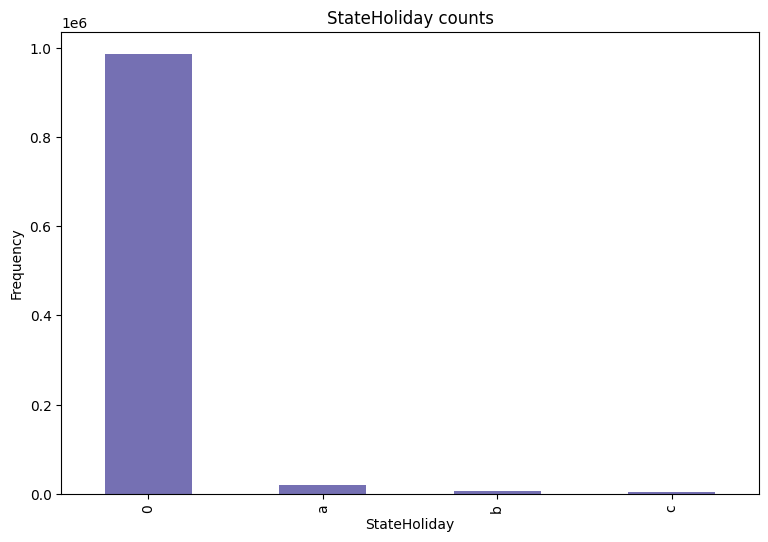

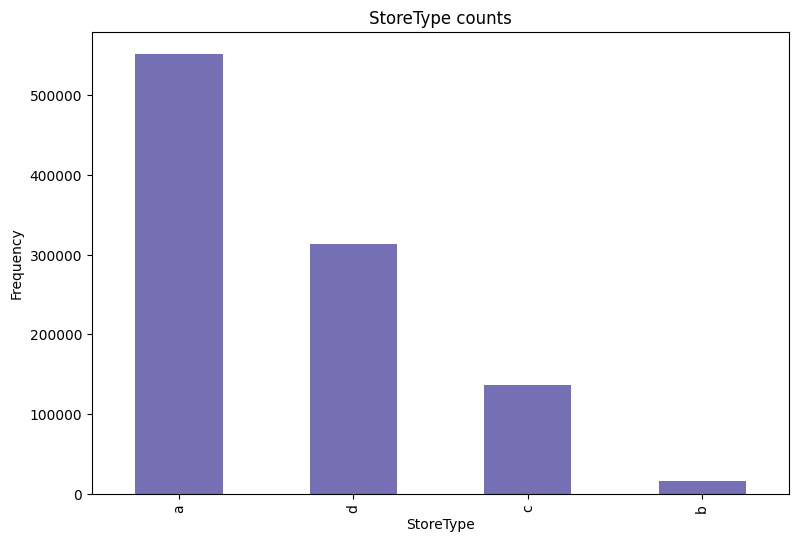

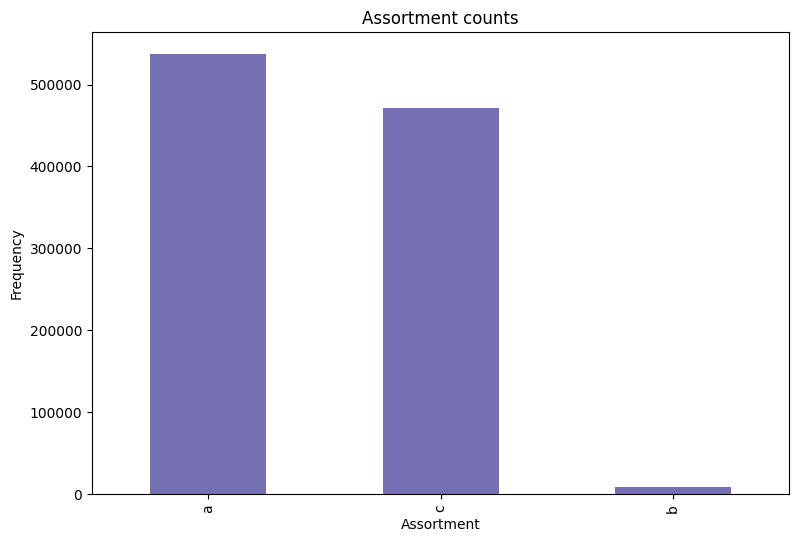

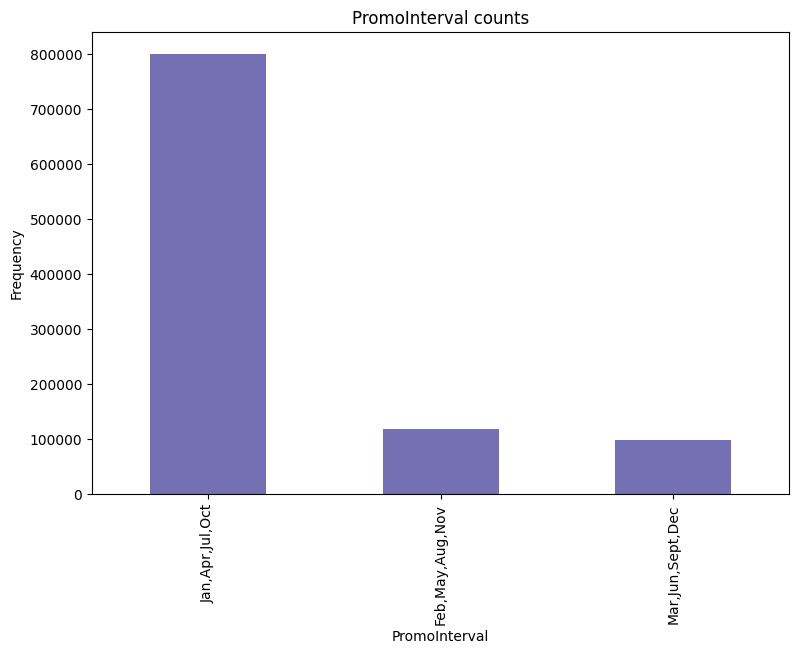

In [35]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = project[col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color="#7570B3")
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

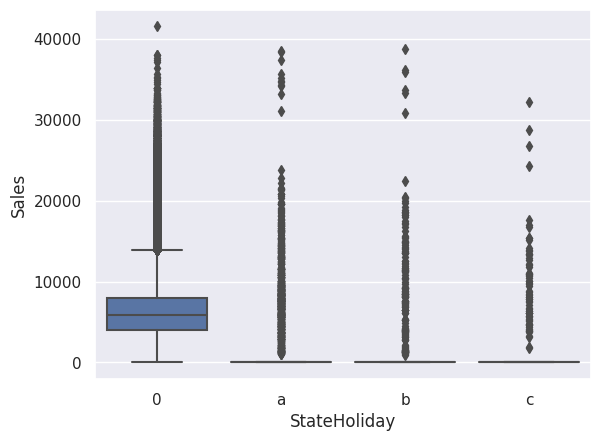

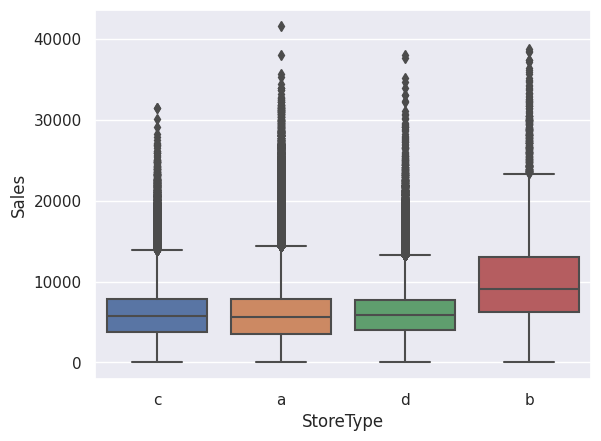

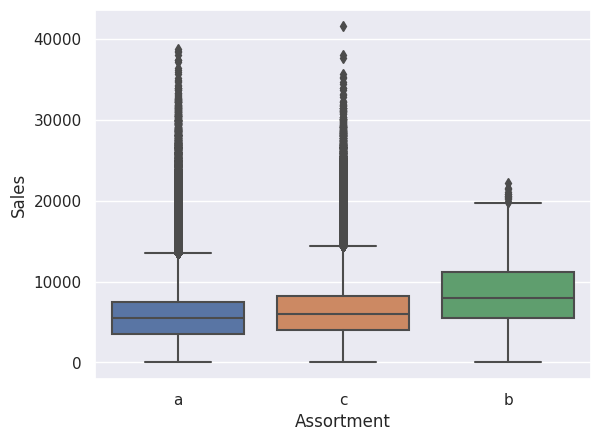

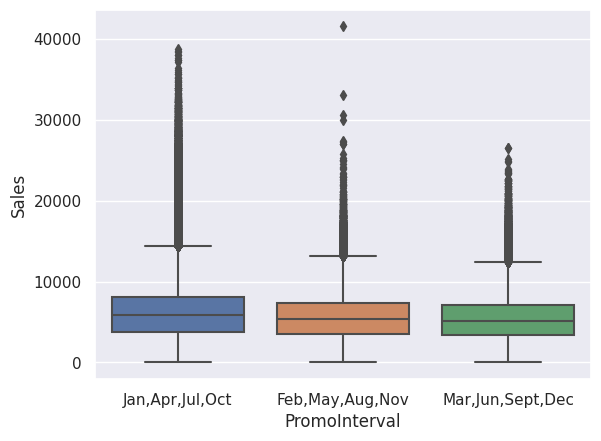

In [36]:
for col in categorical_features: 
  sns.set(style="darkgrid")

  sns.boxplot(x=project[col],y=project['Sales'])
  plt.show()

In [37]:
### Data encoding
#label encoding
encode={'PromoInterval':{'Jan,Apr,Jul,Oct':0, 'Feb,May,Aug,Nov':1,'Mar,Jun,Sept,Dec':1},'StoreType':{'a':1,'b':2,'c':3,'d':4}}
project2= project.replace(encode)

In [38]:
project2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,3,a,1270.0,9.0,2008.0,0,14.0,2011.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,1,a,570.0,11.0,2007.0,1,13.0,2010.0,0
2,3,5,2015-07-31,8314,821,1,1,0,1,1,a,14130.0,12.0,2006.0,1,14.0,2011.0,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,c,620.0,9.0,2009.0,0,14.0,2011.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,1,a,29910.0,4.0,2015.0,0,14.0,2011.0,0


In [39]:
features = numerical_features.copy()
features.extend(['StoreType' ,'PromoInterval'])

In [40]:
features

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'StoreType',
 'PromoInterval']

In [41]:
X = project2[features]
Y = project2['Sales']

In [42]:
X.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,StoreType,PromoInterval
0,1,5,555,1,1,1,1270.0,0,3,0
1,2,5,625,1,1,1,570.0,1,1,0
2,3,5,821,1,1,1,14130.0,1,1,0
3,4,5,1498,1,1,1,620.0,0,3,0
4,5,5,559,1,1,1,29910.0,0,1,0


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(813767, 10)
(203442, 10)


In [44]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# **`Modelling:`**
### These are the columns that i kept for modelling ['Store','DayOfWeek''Customers','Open','Promo','SchoolHoliday','CompetitionDistance','Promo2','StoreType','PromoInterval'] and outcome veriable is [ 'sales'] 
### Ill be using LinearRegression,random forest,Lasso regression , Ridge regression, Elasticnet regression. etc

## **HYPERPARAMETER TUNING**

In [45]:
lasso = Lasso()
alphaslasso= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, alphaslasso, cv=3)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.473e+11, tolerance: 8.054e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.504e+11, tolerance: 8.047e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.440e+11, tolerance: 8.041e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [46]:
print('best alpha :-', lasso_regressor.best_params_)

best alpha :- {'alpha': 0.001}


In [47]:
ridge = Ridge()
alphasRidge= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, alphasRidge, cv=3)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [48]:
print('best alpha :-', ridge_regressor.best_params_)

best alpha :- {'alpha': 5}


In [49]:
elastic = ElasticNet()
alphaselastic = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10],'l1_ratio':[0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic,alphaselastic, cv=3)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.476e+11, tolerance: 8.054e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.505e+11, tolerance: 8.047e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.441e+11, tolerance: 8.041e

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10],
                         'l1_ratio': [0.3, 0.4, 0.5]})

In [50]:
print('best alpha :-', elastic_regressor.best_params_)

best alpha :- {'alpha': 1e-05, 'l1_ratio': 0.3}


## **Implementing Linear Regression**

In [51]:
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)


LinearRegression()

In [52]:
linearreg.score(X_train, Y_train)

0.8639287902867376

In [53]:
Y_predlr=linearreg.predict(X_test)
print('R2 Score:- ', r2_score(Y_test,Y_predlr))
print('RMSE:- ',math.sqrt(mean_squared_error(Y_test,Y_predlr)))

R2 Score:-  0.8646693724852506
RMSE:-  1414.1234073776816


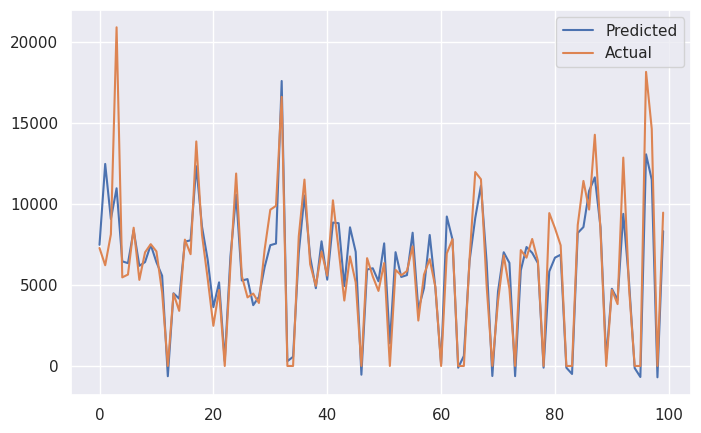

In [54]:
plt.figure(figsize=(8,5))
plt.plot(Y_predlr[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing Lasso Regression**

In [55]:
lassoreg=Lasso(alpha=0.001,max_iter=1000)
lassoreg.fit(X_train, Y_train)

Lasso(alpha=0.001)

In [56]:
lassoreg.score(X_train, Y_train)

0.8639287902860429

In [57]:
Y_predlassor=lassoreg.predict(X_test)
print('R2 Score:- ', r2_score(Y_test,Y_predlassor))
print('RMSE:- ',math.sqrt(mean_squared_error(Y_test,Y_predlassor)))

R2 Score:-  0.8646693706054351
RMSE:-  1414.1234171991496


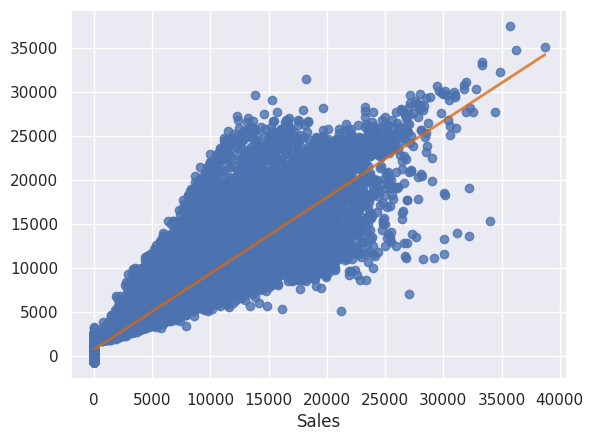

In [58]:
sns.regplot(x=Y_test, y=Y_predlassor, line_kws={"color":"#D95F02","alpha":0.7,"lw":2})
plt.show()

## **Implementing Ridge Regression**

In [59]:
ridgereg=Ridge(alpha=5)
ridgereg.fit(X_train, Y_train)

Ridge(alpha=5)

In [60]:
ridgereg.score(X_train, Y_train)

0.8639287902521129

In [61]:
Y_predridge=ridgereg.predict(X_test)
print('R2 Score:- ', r2_score(Y_test,Y_predridge))
print('RMSE:- ',math.sqrt(mean_squared_error(Y_test,Y_predridge)))

R2 Score:-  0.8646693443062052
RMSE:-  1414.123554604685


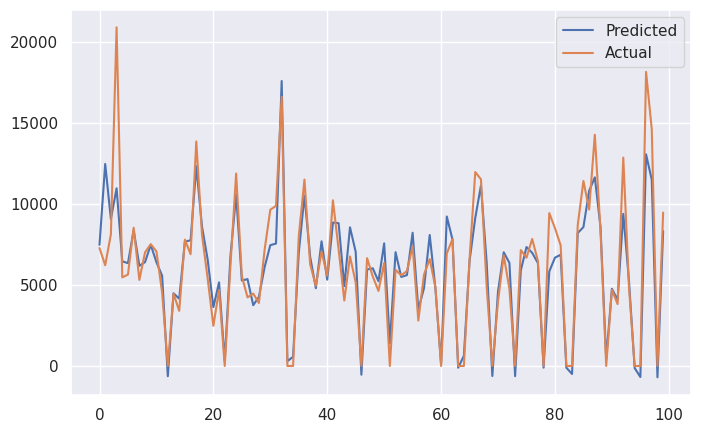

In [62]:
plt.figure(figsize=(8,5))
plt.plot(Y_predridge[:100])
plt.plot(np.array(Y_test)[:100])
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing ElasticNet Regression**

In [63]:
elasticreg=ElasticNet(alpha=1e-05,l1_ratio=0.3)
elasticreg.fit(X_train, Y_train)

ElasticNet(alpha=1e-05, l1_ratio=0.3)

In [64]:
elasticreg.score(X_train, Y_train)

0.863928790241783

In [65]:
Y_predelastic=elasticreg.predict(X_test)
print('R2 Score:- ', r2_score(Y_test,Y_predelastic))
print('RMSE:- ',math.sqrt(mean_squared_error(Y_test,Y_predelastic)))

R2 Score:-  0.8646693403701384
RMSE:-  1414.1235751694442


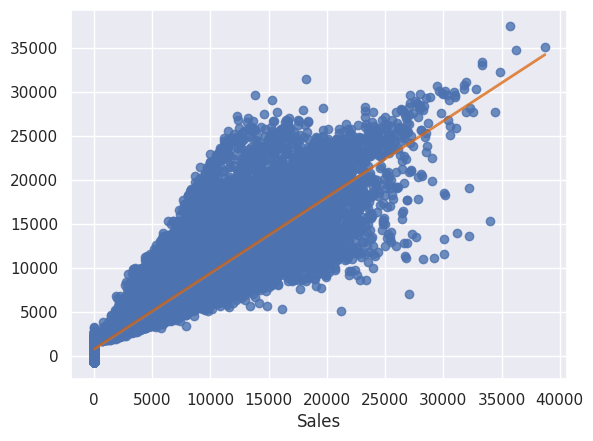

In [66]:
sns.regplot(x=Y_test, y=Y_predelastic, line_kws={"color":"#D95F02","alpha":0.7,"lw":2})
plt.show()

## **Implementing RandomForest Regression**

In [67]:
rfreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfreg.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [68]:
rfreg.score(X_train, Y_train)

0.9971211473321562

In [69]:
Y_predrf=rfreg.predict(X_test)
print('R2 Score:- ', r2_score(Y_test,Y_predrf))
print('RMSE:- ',math.sqrt(mean_squared_error(Y_test,Y_predrf)))

R2 Score:-  0.9826337367639656
RMSE:-  506.57348361821425


## **Feature Importances**

In [70]:
importancesRandomForest = rfreg.feature_importances_

In [71]:
importancesRandomForestdict={'features':list(X.columns),'features importances':importancesRandomForest}
importancesRandomForestdf=pd.DataFrame(importancesRandomForestdict)

<ipython-input-72-545108ecb066>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


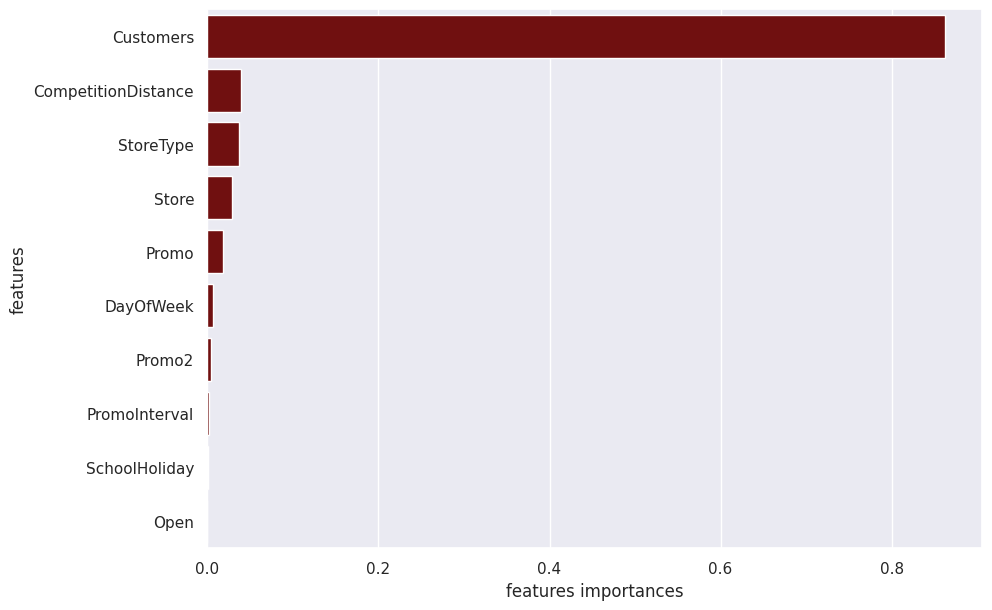

In [72]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = importancesRandomForestdf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x='features importances', 
    y='features', 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color='maroon');

In [73]:
model=['linear','Lasso ', 'Ridge ','Elasticnet ','Random Forest ']
trainingscore=[linearreg.score(X_train, Y_train),lassoreg.score(X_train, Y_train),
               ridgereg.score(X_train, Y_train),elasticreg.score(X_train, Y_train),rfreg.score(X_train, Y_train)]
testingscore=[r2_score(Y_test,Y_predlr),r2_score(Y_test,Y_predlassor),r2_score(Y_test,Y_predridge),r2_score(Y_test,Y_predelastic),
              r2_score(Y_test,Y_predrf)]   
randomsqe=[math.sqrt(mean_squared_error(Y_test,Y_predlr)),math.sqrt(mean_squared_error(Y_test,Y_predlassor)),math.sqrt(mean_squared_error(Y_test,Y_predridge)),
           math.sqrt(mean_squared_error(Y_test,Y_predelastic)),math.sqrt(mean_squared_error(Y_test,Y_predrf))]                          

# **`conclusion `**



In [74]:
conclusiondict={'Machine Learning Model':model,'Training Score':trainingscore,'Testing Score':testingscore,'Root Mean Squre Error':randomsqe}

In [75]:
Conclusion=pd.DataFrame(conclusiondict).set_index('Machine Learning Model')

In [76]:
conclusion=Conclusion.copy()
conclusion.drop(['Root Mean Squre Error'],axis=1,inplace=True)

Text(0.5, 0, 'Model')

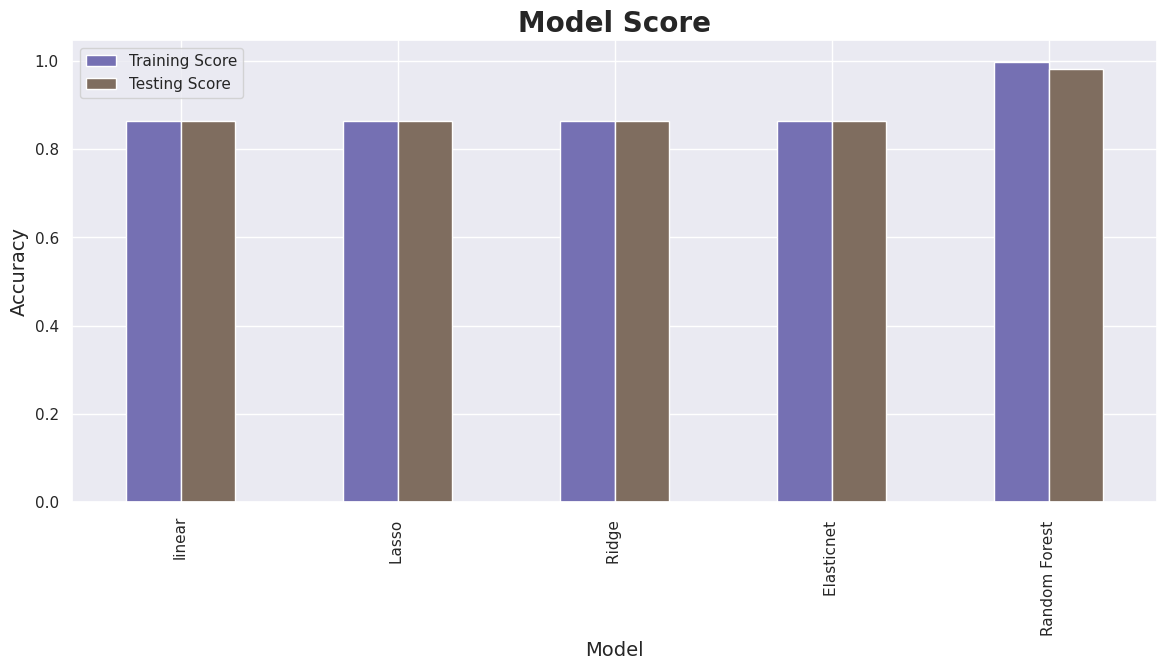

In [77]:
conclusion.plot.bar(figsize=(14,6),color=("#7570B3",'#7f6d5f'))
plt.title('Model Score',fontweight="bold", size=20)
plt.ylabel("Accuracy",size=14)
plt.xlabel("Model",size=14)

In [78]:
Conclusion

,Training Score,Testing Score,Root Mean Squre Error
Machine Learning Model,,,
linear,0.863929,0.864669,1414.123407
Lasso,0.863929,0.864669,1414.123417
Ridge,0.863929,0.864669,1414.123555
Elasticnet,0.863929,0.864669,1414.123575
Random Forest,0.997121,0.982634,506.573484


## * Random forest model gives better results compared to other models
## * random forest model gives 99% tranining accuracy and 98% testing accureacy 
## * random forest model gives less random mean squer error compare to other models.